

---



Image Classification from chest X-ray images for COVID-19 positive cases along with Normal and Viral Pneumonia images. The datased used is created by a team of researchers from Qatar University, Doha, Qatar, and the University of Dhaka, Bangladesh along with their collaborators from Pakistan and Malaysia in collaboration with medical doctors. The dataset consist of  :
*   3616 COVID-19 positive cases images
*   10,192 Normal images
*   6012 Lung Opacity (Non-COVID lung infection) images
*   1345 Viral Pneumonia images









---



**IMPORT LIBRARY**

In [ ]:
# Install for spliting folder
!pip install split-folders
!pip install split-folders tqdm

In [ ]:
import os
import shutil
import splitfolders
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import zipfile,os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

**DOWNLOAD DATASET FROM KAGGLE**

Username and Key API Kaggle

In [ ]:
import os
os.environ['KAGGLE_USERNAME'] = "novitadwiu"
os.environ['KAGGLE_KEY'] = "817502214a8c4d03dadabed9bed651ab"

COVID-19 Radiography Dataset from https://www.kaggle.com/preetviradiya/covid19-radiography-dataset

In [ ]:
!kaggle datasets download -d preetviradiya/covid19-radiography-dataset

 99% 739M/747M [00:12<00:00, 73.1MB/s]
100% 747M/747M [00:12<00:00, 61.7MB/s]


**FILE EXTRACTION**

In [ ]:
local_zip = '/content/covid19-radiography-dataset.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
os.listdir('/content/COVID-19_Radiography_Dataset/COVID-19_Radiography_Dataset')

['Viral Pneumonia', 'COVID', 'Normal', 'Lung_Opacity']

**SPLIT THE DATASET INTO 80% TRAINING SET AND 20% VALIDATION SET**

In [ ]:
splitfolders.ratio('/content/COVID-19_Radiography_Dataset/COVID-19_Radiography_Dataset', output="/content/COVID-19_Radiography_Dataset/COVID-19_Radiography_Dataset/output_result", ratio=(.8, .2))

Copying files: 21165 files [00:05, 4187.75 files/s]


**DATASET DIRECTORY**

In [ ]:
base_dir = '/content/COVID-19_Radiography_Dataset/COVID-19_Radiography_Dataset/output_result'
train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir, 'val')

In [ ]:
ViralPneumonia = os.path.join(base_dir,'Viral Pneumonia')
train_ViralPneumonia = os.path.join(train_dir, 'Viral Pneumonia')
val_ViralPneumonia = os.path.join(validation_dir, 'Viral Pneumonia')

In [ ]:
Normal = os.path.join(base_dir,'Normal')
train_Normal = os.path.join(train_dir, 'Normal')
val_Normal = os.path.join(validation_dir, 'Normal')

In [ ]:
LungOpacity = os.path.join(base_dir,'LungOpacity')
train_LungOpacity = os.path.join(train_dir, 'LungOpacity')
val_LungOpacity = os.path.join(validation_dir, 'LungOpacity')

**CHECKING THE TRAIN AND VAL DIRECTORY**

In [ ]:
os.listdir('/content/COVID-19_Radiography_Dataset/COVID-19_Radiography_Dataset/output_result/train')

['Viral Pneumonia', 'COVID', 'Normal', 'Lung_Opacity']

In [ ]:
os.listdir('/content/COVID-19_Radiography_Dataset/COVID-19_Radiography_Dataset/output_result/val')

['Viral Pneumonia', 'COVID', 'Normal', 'Lung_Opacity']

**TRAINING DATA DIRECTORY**

In [ ]:
train_clean_dir = os.path.join(train_dir, 'Viral Pneumonia')
train_clean_dir = os.path.join(train_dir, 'Normal')
train_clean_dir = os.path.join(train_dir, 'Lung_Opacity')
train_clean_dir = os.path.join(train_dir, 'COVID')

**VALIDATION DATA DIRECTORY**

In [ ]:
validation_clean_dir = os.path.join(validation_dir, 'Viral Pneumonia')
validation_clean_dir = os.path.join(validation_dir, 'Normal')
validation_clean_dir = os.path.join(validation_dir, 'Lung_Opacity')
validation_clean_dir = os.path.join(validation_dir, 'COVID')

**IMAGES AUGMENTATION**

In [ ]:
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')
 
test_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

**IMAGES GENERATOR**

In [ ]:
train_generator = train_datagen.flow_from_directory(
        train_dir, 
        target_size=(150, 150),  # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=4,
        class_mode='categorical',
        shuffle=True
    ) 
 
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150), 
        batch_size=4, 
        class_mode='categorical',
        shuffle=True
    )

Found 16930 images belonging to 4 classes.
Found 4235 images belonging to 4 classes.


**MODEL SEQUENTIALS WITH CONV2D MAXPOOLING LAYER**

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2), padding = 'valid'),
    tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2), padding = 'valid'),
    tf.keras.layers.Flatten(),
    tf.keras.layers. Dropout(0.3),
    tf.keras.layers.Dense(518, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 72, 72, 16)        9232      
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 36, 36, 16)        0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 20736)             0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 20736)             0         
_________________________________________________________________
dense_14 (Dense)             (None, 518)              

**COMPILE MODEL**

In [ ]:
# compile model dengan 'adam' optimizer loss function 'categorical_crossentropy' 
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(lr=0.001),
              metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


**DEFINE CALLBACK**

In [ ]:
class Callback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') > 0.85 and logs.get('val_accuracy') > 0.85): 
      print("\nWe have reached %2.2f%% accuracy, so we will stop training." %(0.85*100))
      self.model.stop_training = True

callbacks = Callback()

**TRAINING MODEL**

In [ ]:
training = model.fit(
      train_generator,
      steps_per_epoch=20,  
      epochs=200, 
      validation_data=validation_generator, 
      validation_steps=10,  
      verbose=2,
      callbacks=[callbacks])

Epoch 1/200
20/20 - 7s - loss: 0.4542 - accuracy: 0.8375 - val_loss: 0.4893 - val_accuracy: 0.9000
Epoch 2/200
20/20 - 6s - loss: 0.6181 - accuracy: 0.7500 - val_loss: 0.4974 - val_accuracy: 0.7250
Epoch 3/200
20/20 - 7s - loss: 0.5956 - accuracy: 0.7375 - val_loss: 0.6172 - val_accuracy: 0.6750
Epoch 4/200
20/20 - 6s - loss: 0.7414 - accuracy: 0.6875 - val_loss: 0.6939 - val_accuracy: 0.7250
Epoch 5/200
20/20 - 7s - loss: 0.6704 - accuracy: 0.7000 - val_loss: 0.5095 - val_accuracy: 0.8500
Epoch 6/200
20/20 - 6s - loss: 0.6098 - accuracy: 0.7000 - val_loss: 0.5683 - val_accuracy: 0.7500
Epoch 7/200
20/20 - 6s - loss: 0.7799 - accuracy: 0.7125 - val_loss: 0.3947 - val_accuracy: 0.8500
Epoch 8/200
20/20 - 7s - loss: 0.5987 - accuracy: 0.7750 - val_loss: 0.8625 - val_accuracy: 0.7750
Epoch 9/200
20/20 - 7s - loss: 0.5919 - accuracy: 0.8000 - val_loss: 0.6009 - val_accuracy: 0.7250
Epoch 10/200
20/20 - 6s - loss: 0.5683 - accuracy: 0.7875 - val_loss: 0.6126 - val_accuracy: 0.7250
Epoch 11/

**ACCURATION PLOT**

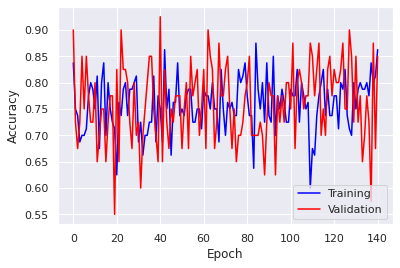

In [ ]:
import seaborn as sns
# Create a color palette
sns.set_theme(style="darkgrid")

plt.plot(range(len(training.history['accuracy'])),training.history['accuracy'], label='Training', color='blue')
plt.plot(range(len(training.history['val_accuracy'])),training.history['val_accuracy'], label='Validation', color='red')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc="lower right")
plt.show()

**LOSS PLOT**

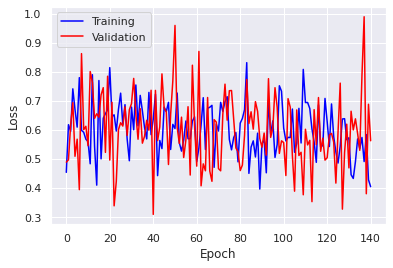

In [ ]:
# Create a color palette
sns.set_theme(style="darkgrid")

plt.plot(range(len(training.history['loss'])),training.history['loss'], label='Training', color='blue')
plt.plot(range(len(training.history['val_loss'])),training.history['val_loss'], label='Validation', color='red')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

**IMAGE PREDICTION**

Saving COVID-1010.png to COVID-1010.png
COVID-1010.png
Lung Condition = COVID


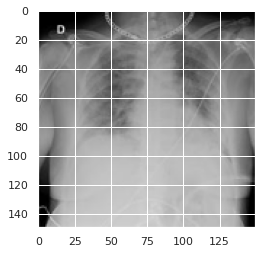

In [ ]:
uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  
  print(fn)
  if classes[0][0] == 1:
    print('Lung Condition = Viral Pneumonia')
  elif classes[0][1] == 1:
    print('Lung Condition = COVID')
  elif classes[0][1] == 2:
    print('Lung Condition = Normal')
  else:
    print('Lung Condition = Lung_Opacity')

**SAVE MODEL TO TF-LITE**

In [ ]:
# Konversi model.
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

INFO:tensorflow:Assets written to: /tmp/tmp014k6tfi/assets


In [ ]:
with tf.io.gfile.GFile('model.tflite', 'wb') as f:
  f.write(tflite_model)